In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.
%matplotlib inline  

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_init = pd.read_csv('titanic/train.csv') # read the train data in data DataFrame
test_data = pd.read_csv('titanic/test.csv') #read the test data
sol = pd.read_csv('titanic/gender_submission.csv') #read the solutions
#test_data['Survived'] = sol['Survived'] #adding the solution to the test set 
data_init.drop(['PassengerId'],1).describe() #Removí la columna PassengerId 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data=(data_init.append(test_data)) #it is formed by appending the test and train data 
data.head()  #Reading the data to check the header

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [5]:
data.describe() #used to check if there are missing values

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
#fill the NaN value
data['Age'].fillna(data['Age'].median(),inplace=True)
data.Cabin.fillna('U',inplace=True)
data.Embarked.fillna('S',inplace=True)
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Age.fillna(data.Age.median(), inplace=True)

          male  female
Total      843     466
Survived   109     233
Died       468      81


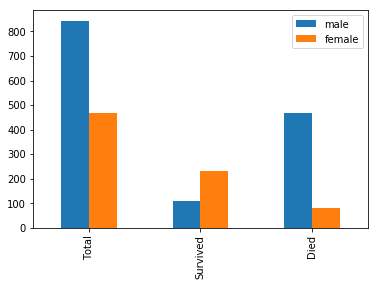

In [7]:
total = data['Sex'].value_counts()
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([total,survived_sex,died_sex])
df.index = ['Total','Survived','Died']
print(df)
df.plot(kind='bar')

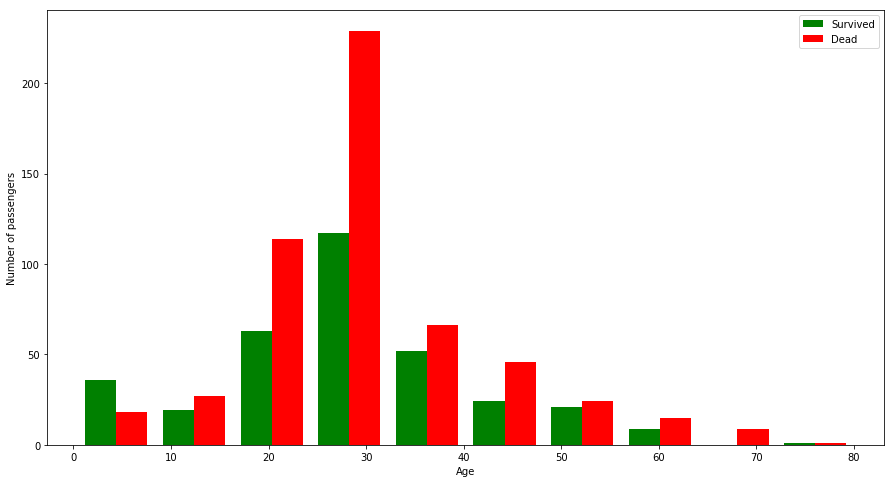

In [8]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

           0.0  1.0  total
1st class   80  136    216
2nd class   97   87    184
3rd class  372  119    491


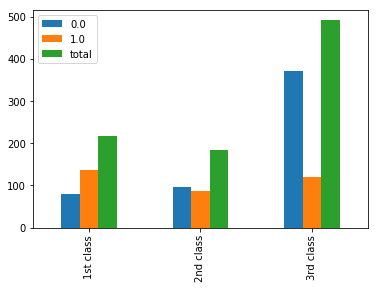

In [9]:
survived_1 = data[data['Pclass']==1]['Survived'].value_counts()
survived_2 = data[data['Pclass']==2]['Survived'].value_counts()
survived_3 = data[data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

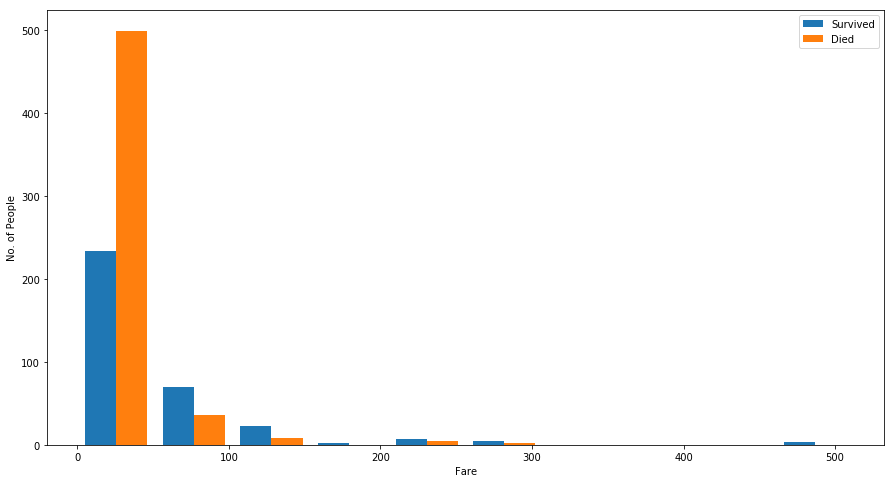

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

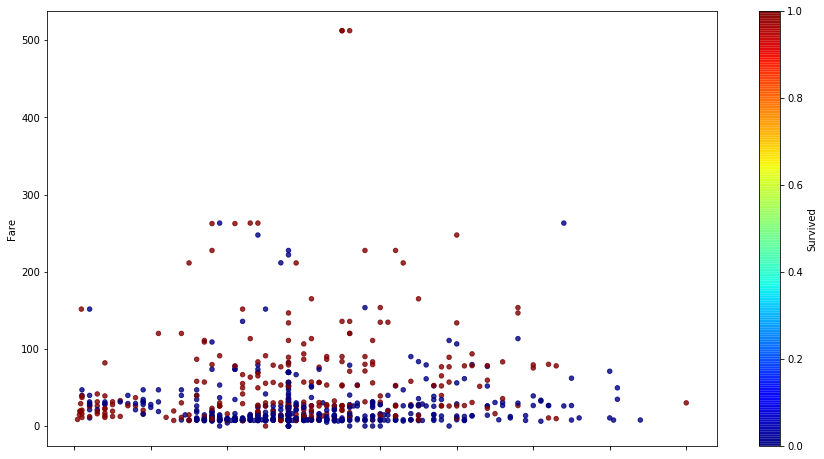

In [24]:
#Age versus Fare
data.plot.scatter('Age','Fare',c='Survived',colormap='jet',alpha=0.8,figsize=(15,8))

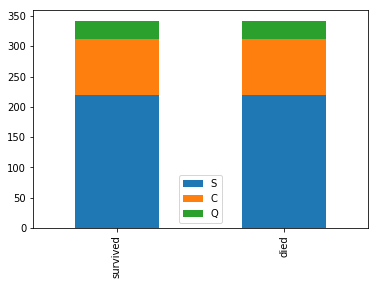

In [25]:
survived_embarkment  = data[data['Survived']==1]['Embarked'].value_counts()
died_embarkment = data[data['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

In [28]:
data_set = data[['Pclass','Sex','Age','Fare','SibSp','Cabin']]
one_hot_encoded_training_predictors = pd.get_dummies(data_set)
one_hot_encoded_training_predictors.head()
X = one_hot_encoded_training_predictors
y = data['Survived']

In [1]:
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=1)
logreg = LogisticRegression() #logistic regression using python
logreg.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [30]:
y_pred = logreg.predict(X_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

NotFittedError: This LogisticRegression instance is not fitted yet

In [31]:
# Train
y_train_pred = logreg.predict(X_train) #predicting the values
print(classification_report(y_train, y_train_pred, target_names=['No sobrevio','Sobrevivio']))

NotFittedError: This LogisticRegression instance is not fitted yet

In [ ]:
# Test
print(classification_report(y_test, y_pred, target_names=['No sobrevió','Sobrevivió']))

In [32]:
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=1)
logreg = LogisticRegression(C=0.03, penalty='l2',class_weight='balanced') #logistic regression using python
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').